In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')


In [4]:
!pip install klib # Installing klib for data visualization,cleaning,pre processing

     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [8]:
df = pd.read_csv("/content/agent_recruitment (1).csv")

In [6]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [ ]:
df.shape

(9527, 23)

**Converting DataTypes:**

In [ ]:
#klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()

In [11]:
df.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [9]:
df.dtypes[df.dtypes== 'int64'] # Finding The Integer value

Office_PIN          int64
Business_Sourced    int64
dtype: object

In [10]:
df.dtypes[df.dtypes == 'float64']

Applicant_City_PIN         float64
Manager_Grade              float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
dtype: object

In [11]:
df.dtypes[df.dtypes== 'object']

ID                             object
Application_Receipt_Date       object
Applicant_Gender               object
Applicant_BirthDate            object
Applicant_Marital_Status       object
Applicant_Occupation           object
Applicant_Qualification        object
Manager_DOJ                    object
Manager_Joining_Designation    object
Manager_Current_Designation    object
Manager_Status                 object
Manager_Gender                 object
Manager_DoB                    object
dtype: object

In [12]:
#Converting Objects into Category
df['ID'] = df['ID'].astype('category')
df['Application_Receipt_Date']= df['Application_Receipt_Date'].astype('category')
df['Applicant_Gender'] = df['Applicant_Gender'].astype('category')
df['Applicant_BirthDate'] = df['Applicant_BirthDate'].astype('category')
df['Applicant_Marital_Status'] = df['Applicant_Marital_Status'].astype('category')
df['Applicant_Occupation']= df['Applicant_Occupation'].astype('category')
df['Applicant_Qualification'] = df['Applicant_Qualification'].astype('category')
df['Manager_DOJ'] = df['Manager_DOJ'].astype('category')
df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].astype('category')
df['Manager_Current_Designation'] = df['Manager_Current_Designation'].astype('category')
df['Manager_Status'] = df['Manager_Status'].astype('category')
df['Manager_Gender'] = df['Manager_Gender'].astype('category')
df['Manager_DoB'] = df['Manager_DoB'].astype('category')

In [13]:
df.dtypes #object is converted to category

ID                             category
Office_PIN                        int64
Application_Receipt_Date       category
Applicant_City_PIN              float64
Applicant_Gender               category
Applicant_BirthDate            category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_DOJ                    category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                   float64
Manager_Status                 category
Manager_Gender                 category
Manager_DoB                    category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Business                float64
Manager_Num_Products            float64
Manager_Business2               float64
Manager_Num_Products2           float64
Business_Sourced                  int64
dtype: object

In [17]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


**Checking The Missing Values In Graphical Format:**

In [ ]:
df.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

GridSpec(6, 6)

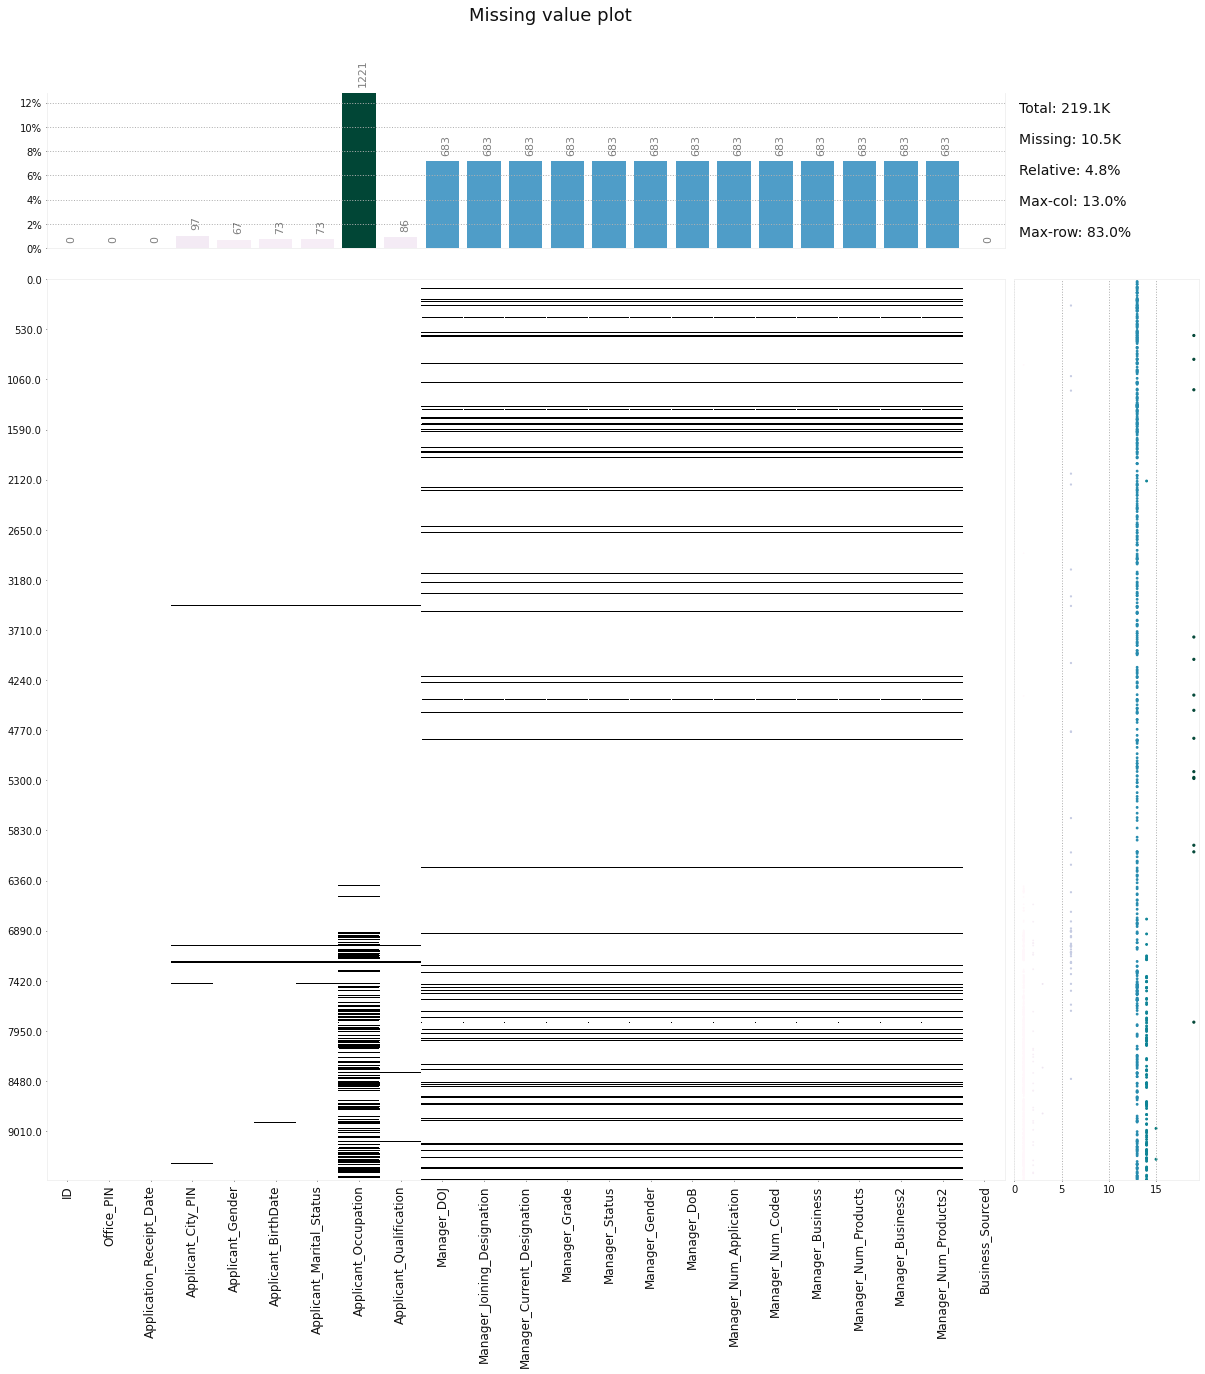

In [ ]:
klib.missingval_plot(df) # returns a figure containing information about missing values


Handling Missing Values:
---



In [ ]:

df['Applicant_City_PIN'].fillna(df['Applicant_City_PIN'].mode()[0], inplace = True)

df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0], inplace = True)

#df['Applicant_BirthDate '].fillna(df['Applicant_BirthDate '].mode()[0], inplace = True)

df['Applicant_Marital_Status'].fillna(df['Applicant_Marital_Status'].mode()[0], inplace = True)

df['Applicant_Occupation'].fillna(df['Applicant_Occupation'].mode()[0], inplace = True)

df['Applicant_Qualification'].fillna(df['Applicant_Qualification'].mode()[0], inplace = True)

df['Manager_DOJ'].fillna(df['Manager_DOJ'].mode()[0], inplace = True)

df['Manager_Joining_Designation'].fillna(df['Manager_Joining_Designation'].mode()[0], inplace = True)

df['Manager_Current_Designation'].fillna(df['Manager_Current_Designation'].mode()[0], inplace = True)

df['Manager_Grade'].fillna(df['Manager_Grade'].mode()[0], inplace = True)

df['Manager_Status'].fillna(df['Manager_Status'].mode()[0], inplace = True)

df['Manager_Gender'].fillna(df['Manager_Gender'].mode()[0], inplace = True)

df['Manager_DoB'].fillna(df['Manager_DoB'].mode()[0], inplace = True)

df['Manager_Num_Application'].fillna(df['Manager_Num_Application'].mode()[0], inplace = True)

df['Manager_Num_Coded'].fillna(df['Manager_Num_Coded'].mode()[0], inplace = True)

df['Manager_Business'].fillna(df['Manager_Business'].mode()[0], inplace = True)

df['Manager_Num_Products'].fillna(df['Manager_Num_Products'].mode()[0], inplace = True)

df['Manager_Business2'].fillna(df['Manager_Business2'].mode()[0], inplace = True)

df['Manager_Num_Products2'].fillna(df['Manager_Num_Products2'].mode()[0], inplace = True)




Univeriate Analysis

In [19]:
df.dtypes

ID                             category
Office_PIN                        int64
Application_Receipt_Date       category
Applicant_City_PIN              float64
Applicant_Gender               category
Applicant_BirthDate            category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_DOJ                    category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                   float64
Manager_Status                 category
Manager_Gender                 category
Manager_DoB                    category
Manager_Num_Application         float64
Manager_Num_Coded               float64
Manager_Business                float64
Manager_Num_Products            float64
Manager_Business2               float64
Manager_Num_Products2           float64
Business_Sourced                  int64
dtype: object

In [ ]:
df['Applicant_BirthDate']= pd.to_numeric(df['Applicant_BirthDate'])
df['Manager_DOJ']= pd.to_numeric(df['Manager_DOJ'])
df['Manager_DoB']= pd.to_numeric(df['Manager_DoB'])


In [18]:
numerical = df.select_dtypes(include=['int64','float64'])
numerical.dtypes

Office_PIN                   int64
Applicant_City_PIN         float64
Manager_Grade              float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
Business_Sourced             int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1355: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  line_segs, transform=trans, colors=colors, **kws
/usr/local/lib/python3.7/dist-packages/klib/describe.py:567: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  g.axes[0, 0].set_ylim(0)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1355: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  line_segs, transform=trans, colors=colors, **kws
/usr/local/lib/python3.7/dist-packages/klib/describe.py:567: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  g.axes[0, 0].set_ylim(0)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1355: UserWarning: Attempt

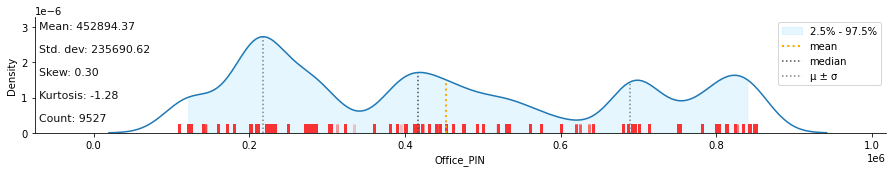

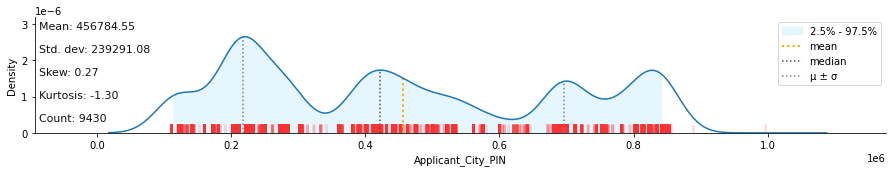

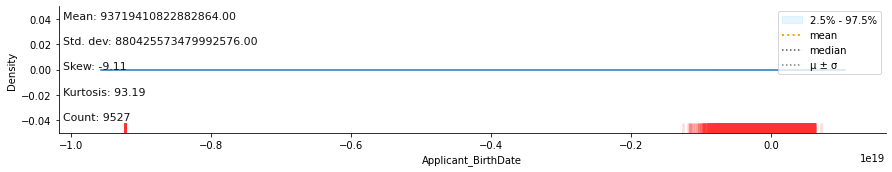

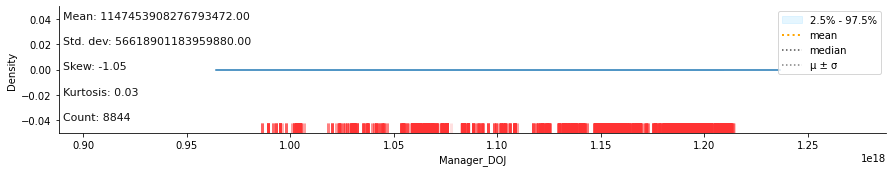

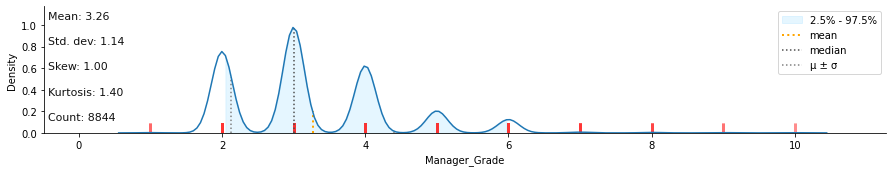

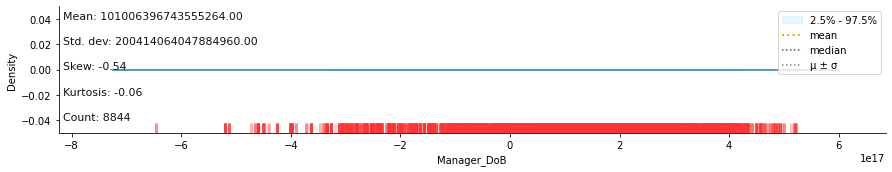

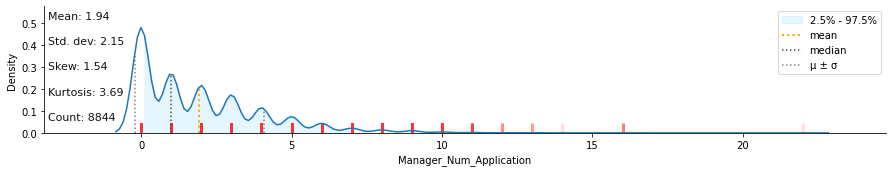

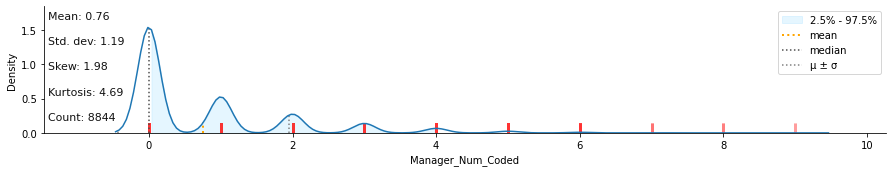

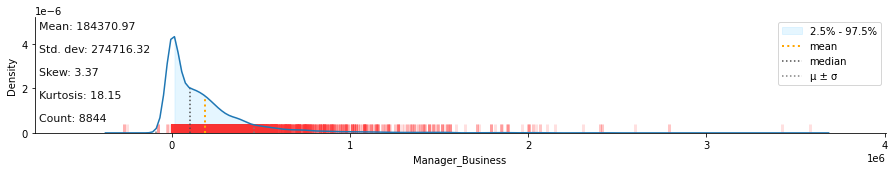

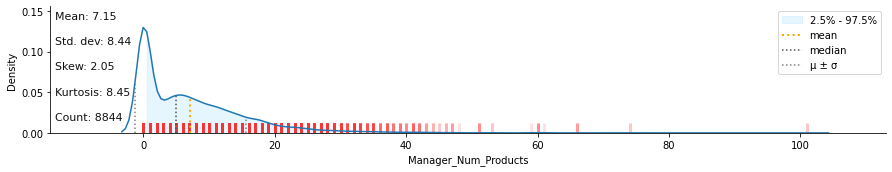

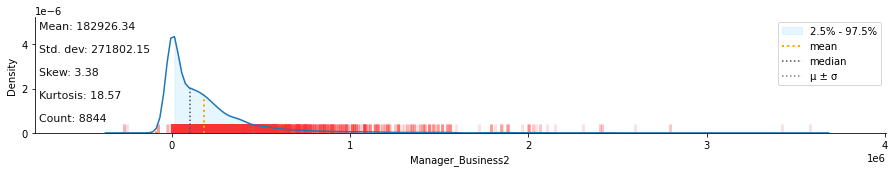

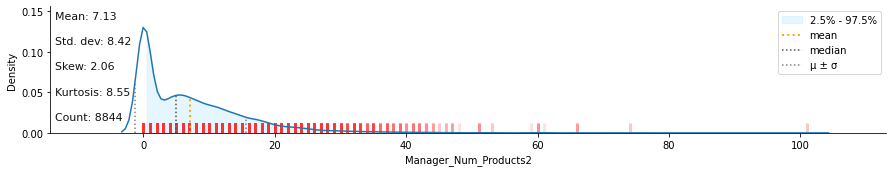

In [ ]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


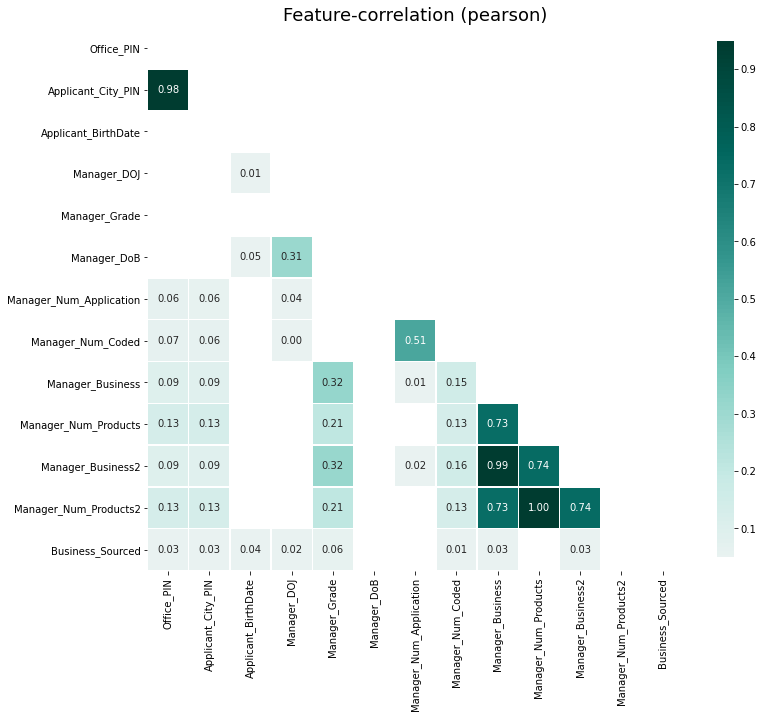

In [ ]:
klib.corr_plot(df, split='pos') # returns a color-encoded heatmap, ideal for correlations for positive values

In [ ]:
klib.num_pipe() # provides common operations for preprocessing of numerical data

Pipeline(steps=[('columnselector', ColumnSelector()),
                ('iterativeimputer',
                 IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25,
                                                                n_jobs=4,
                                                                random_state=408),
                                  random_state=408)),
                ('robustscaler', RobustScaler())])

In [ ]:
df['Manager_Grade'].value_counts()

3.0     3207
2.0     2471
4.0     2038
5.0      666
6.0      406
7.0       22
8.0       14
1.0        8
9.0        7
10.0       5
Name: Manager_Grade, dtype: int64

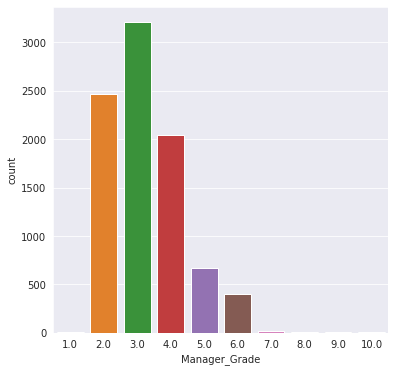

3.0     3207
2.0     2471
4.0     2038
5.0      666
6.0      406
7.0       22
8.0       14
1.0        8
9.0        7
10.0       5
Name: Manager_Grade, dtype: int64

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Manager_Grade', data=df)
plt.show()

df['Manager_Grade'].value_counts()
#We can see that Grade 3.0 have has the maximum number of manager's .



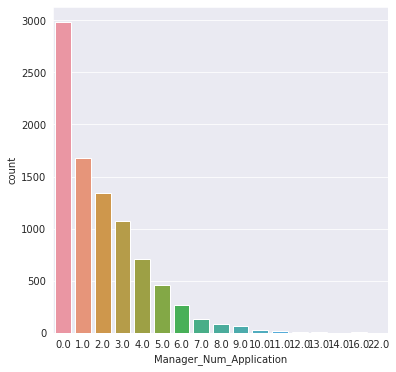

0.0     2980
1.0     1677
2.0     1339
3.0     1073
4.0      710
5.0      458
6.0      270
7.0      132
8.0       84
9.0       63
10.0      27
11.0      14
16.0       6
12.0       5
13.0       4
14.0       1
22.0       1
Name: Manager_Num_Application, dtype: int64

In [ ]:
#Manager_Num_Application
plt.figure(figsize=(6,6))
sns.countplot(x='Manager_Num_Application', data=df)
plt.show()

df['Manager_Num_Application'].value_counts()
#Manager no of application in last 3months

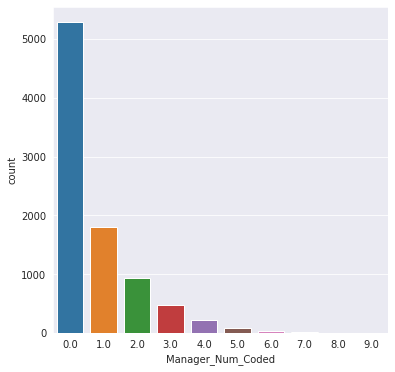

0.0    5283
1.0    1799
2.0     936
3.0     471
4.0     225
5.0      83
6.0      30
7.0       7
8.0       6
9.0       4
Name: Manager_Num_Coded, dtype: int64

In [ ]:
#Manager_Num_Coded
plt.figure(figsize=(6,6))
sns.countplot(x='Manager_Num_Coded', data=df)
plt.show()

df['Manager_Num_Coded'].value_counts()
#Manager no of application in last 3months

In [ ]:
df.select_dtypes(include = [ 'int','float']).dtypes

Office_PIN                   int64
Applicant_City_PIN         float64
Applicant_BirthDate          int64
Manager_DOJ                float64
Manager_Grade              float64
Manager_DoB                float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
Business_Sourced             int64
dtype: object

**Categorical:**

In [ ]:
df.select_dtypes(include = [ 'category']).dtypes

ID                             category
Application_Receipt_Date       category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Status                 category
Manager_Gender                 category
dtype: object


**Nominal**:Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation
            
---
**Odinal**:Manager_Status,Manager_Joining_Designation,Manager_Current_Designation,Applicant_Qualification 


In [ ]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

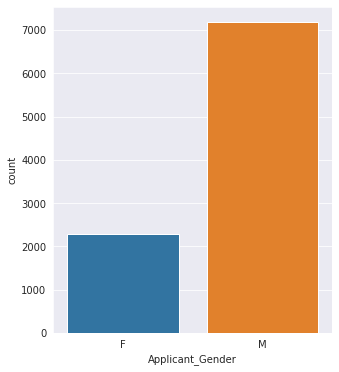

In [ ]:

#Applicant_Gender
plt.figure(figsize=(5,6))
sns.countplot(x='Applicant_Gender', data=df)
plt.show()

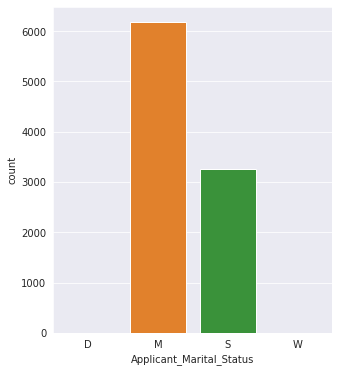

In [ ]:
#Applicant_Marital_Status
plt.figure(figsize=(5,6))
sns.countplot(x='Applicant_Marital_Status', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


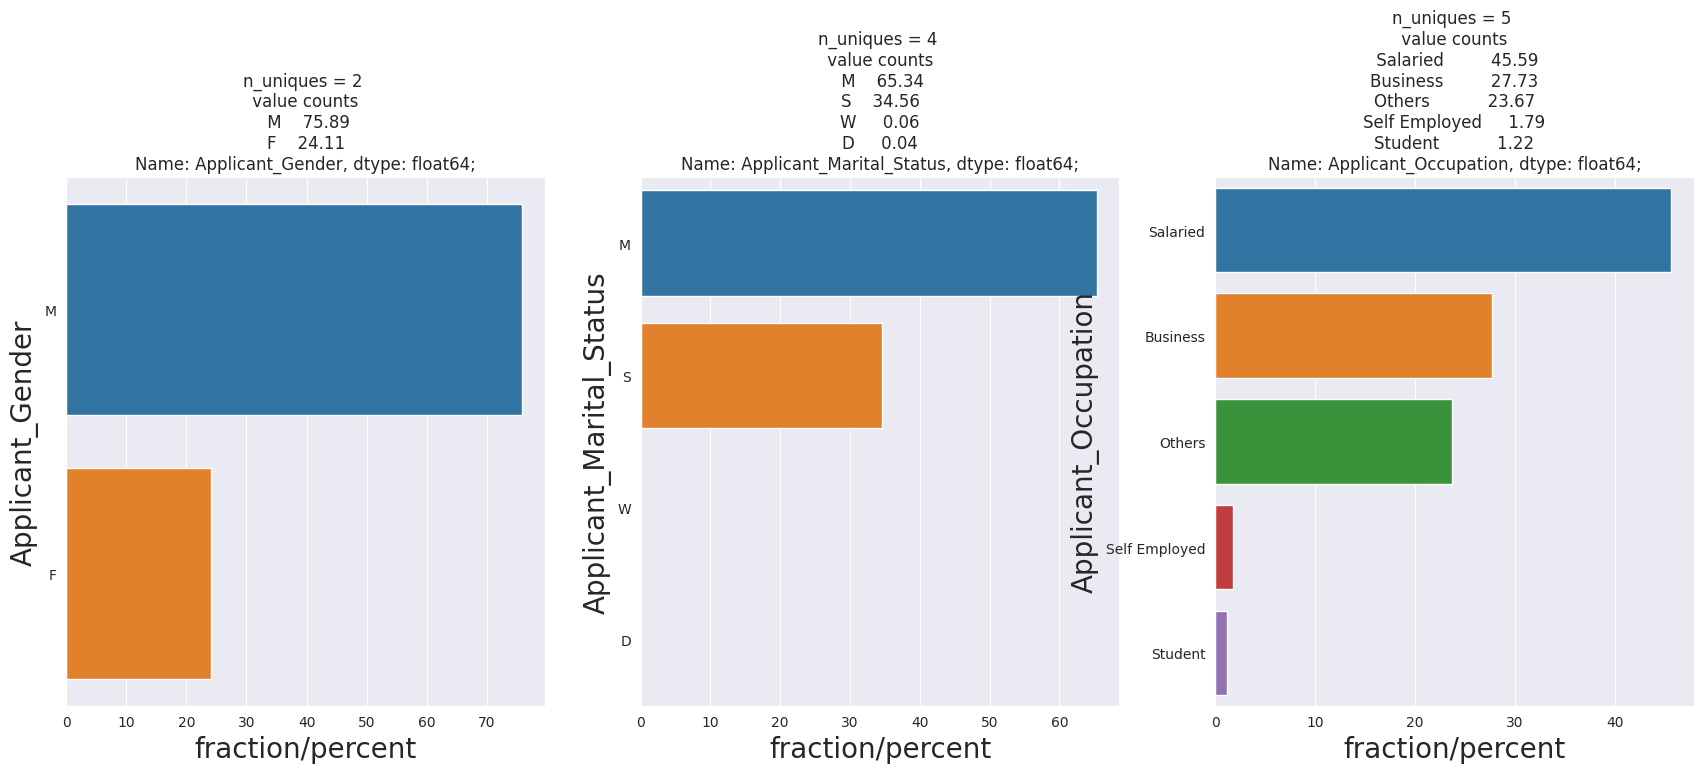

In [ ]:
UVA_category(df, ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation'])

In Applicant_gender Number of Male Candidates is More Than female.
In Applicant_Maratial_status number of married peoples are more than others.
In Applicant_Occupation number of Salaried are more .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


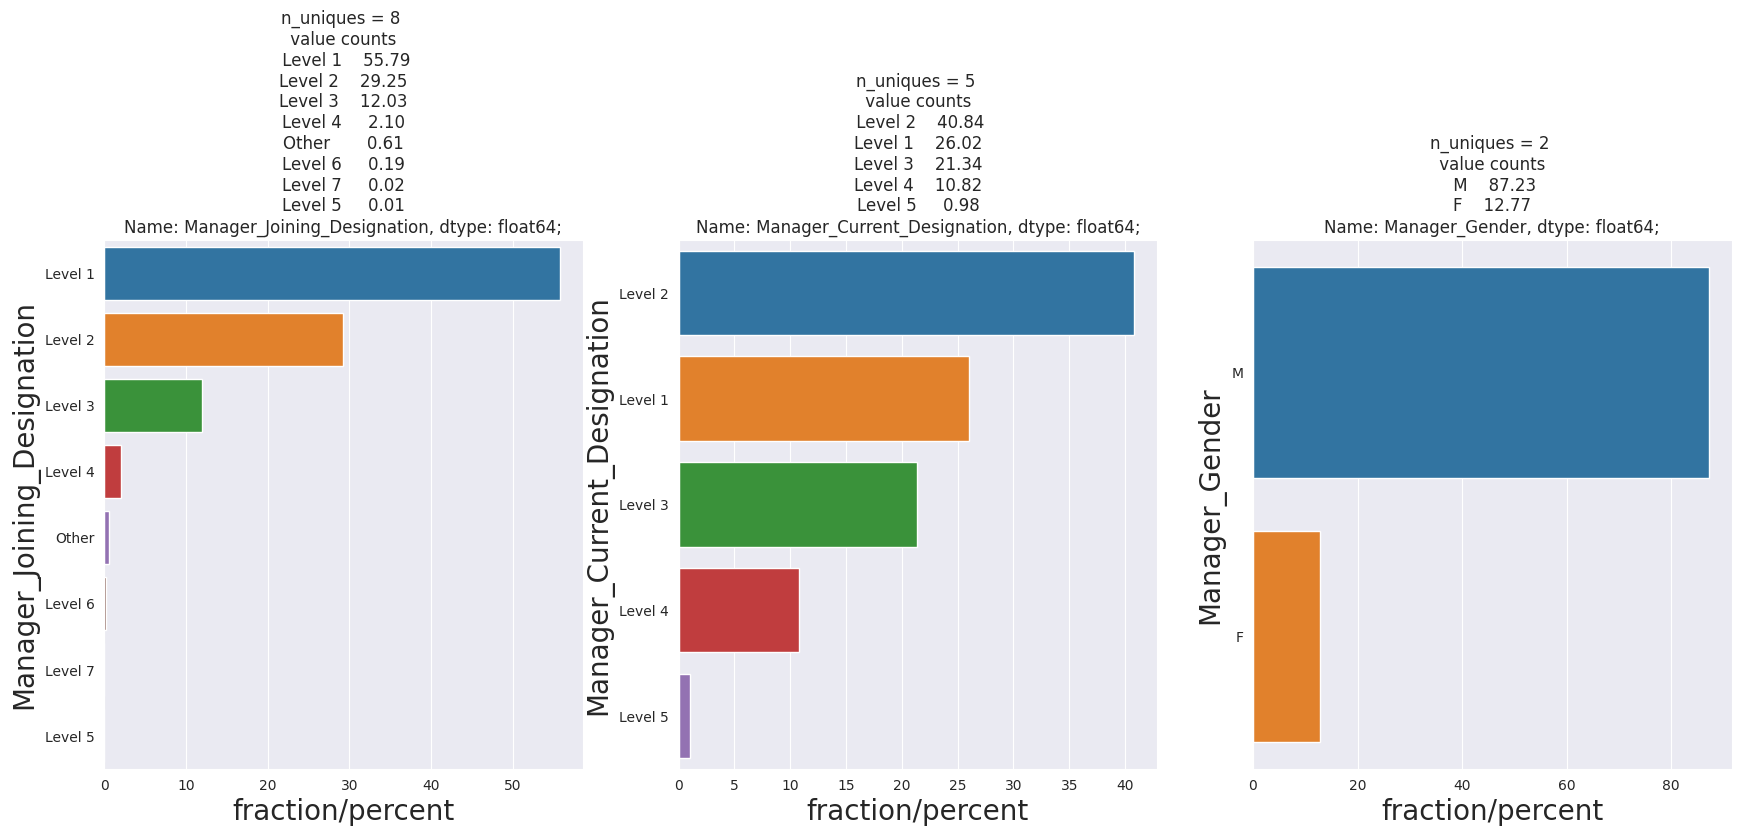

In [ ]:
UVA_category(df, ['Manager_Joining_Designation','Manager_Current_Designation','Manager_Gender'])



   From the above graph we can see that there is a change in designation

*   From the above graph we can see that there is a change in designation
*   or increase in the level with increase in time .
    And the percentage of Male is more in comparision to female


   



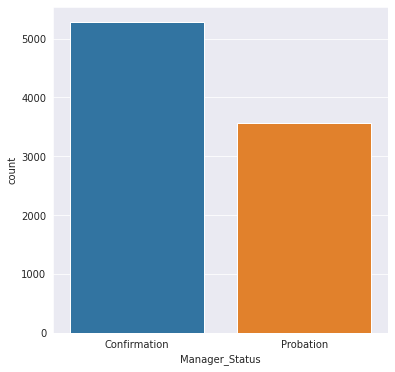

Confirmation    5277
Probation       3567
Name: Manager_Status, dtype: int64

In [ ]:
# Manager_Status
plt.figure(figsize=(6,6))
sns.countplot(x='Manager_Status', data=df)
plt.show()

df['Manager_Status'].value_counts()

#It will show number of Manager's who are in Conformation and Probation 

# Biveriate

In [ ]:
numerical = df.select_dtypes(exclude = ['category'])[:] #It will exclude the category data types and give results for int and float.
numerical.dtypes

Office_PIN                   int64
Applicant_City_PIN         float64
Applicant_BirthDate          int64
Manager_DOJ                float64
Manager_Grade              float64
Manager_DoB                float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
Business_Sourced             int64
dtype: object

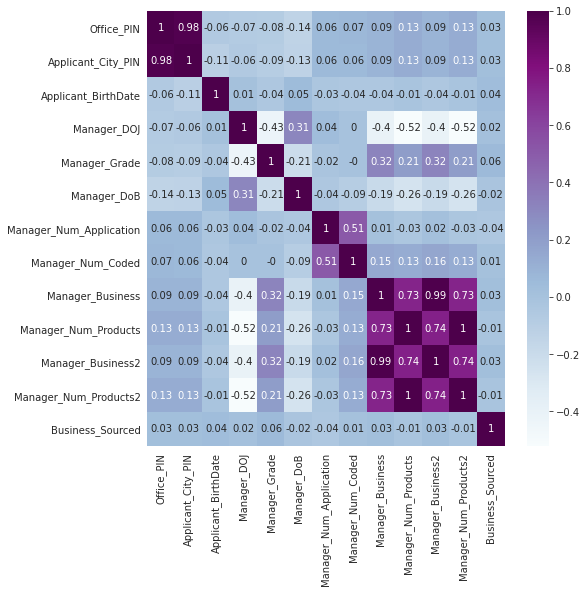

In [ ]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

<Figure size 840x560 with 0 Axes>

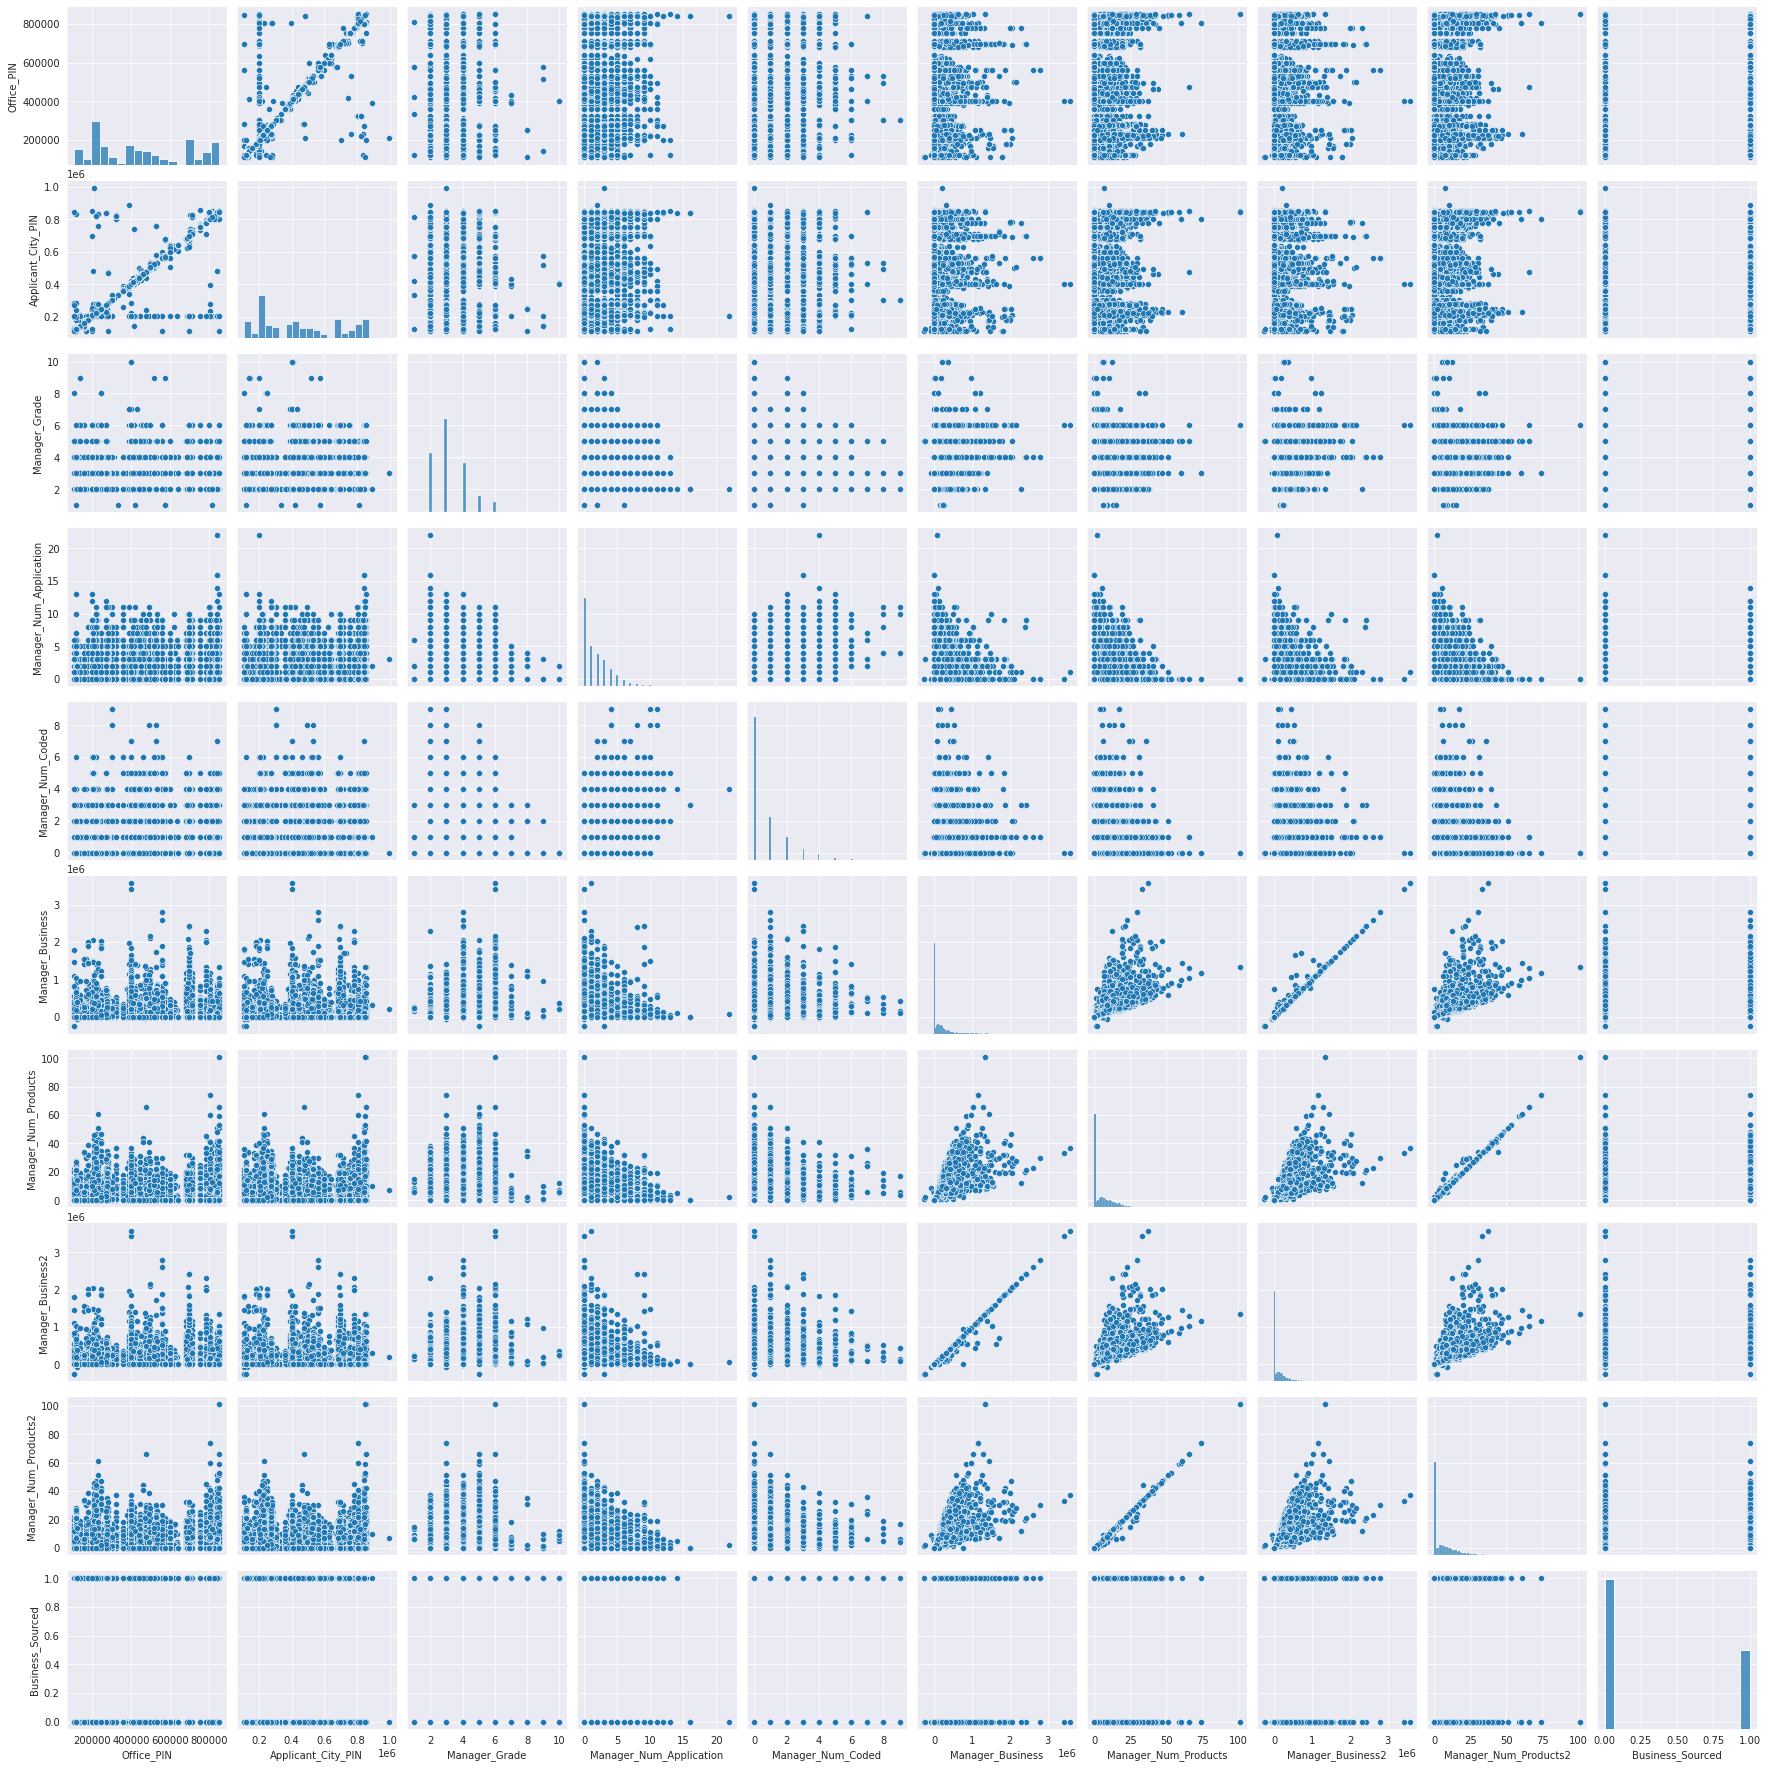

In [ ]:
plt.figure(dpi=140)
sns.pairplot(data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


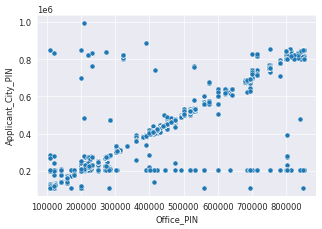

In [ ]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Office_PIN'], numerical['Applicant_City_PIN'])

# Categorical-Categorical

In [22]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

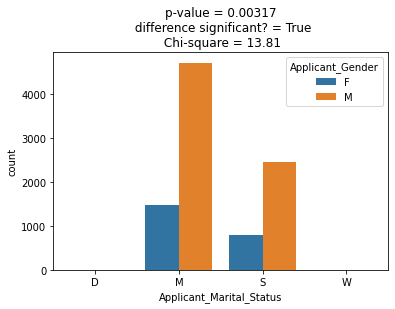

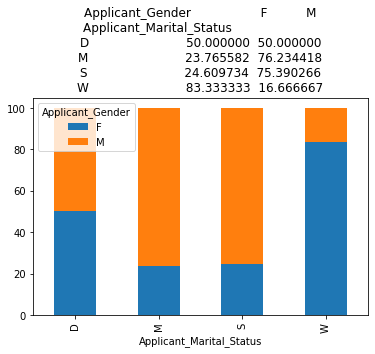

In [33]:
BVA_categorical_plot(df, 'Applicant_Gender', 'Applicant_Marital_Status')

By the p_value of the Chi-square test, although it is slightly approximated to the level of significance (0.003), we can assume that the Age has a significant impact on the Applicant_Marital status.

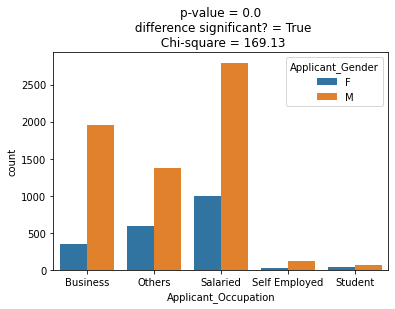

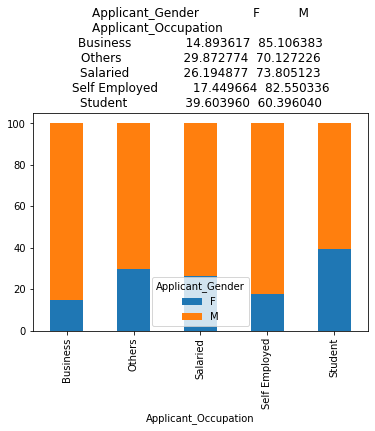

In [34]:
BVA_categorical_plot(df, 'Applicant_Gender', 'Applicant_Occupation')

By the p_value of the Chi-square test it shows P=0, we can assume that the Age has a significant impact on the Applicant_Occupation status.

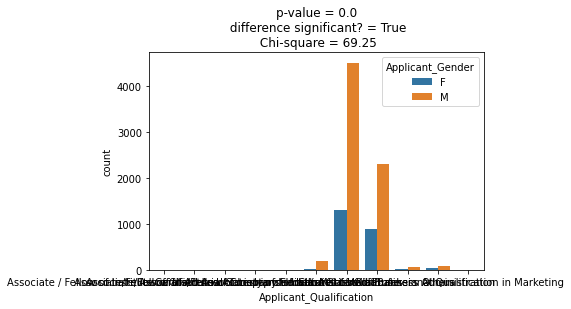

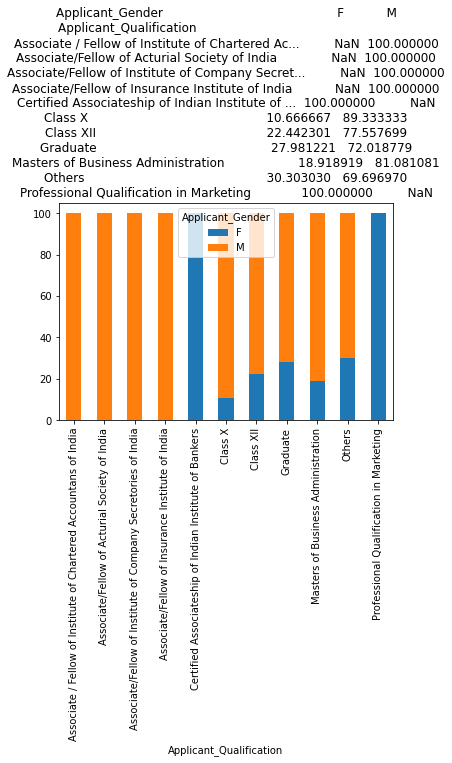

In [36]:
BVA_categorical_plot(df, 'Applicant_Gender', 'Applicant_Qualification')

By the p_value of the Chi-square test as p=0 , we can assume that the Age has a significant impact on the Applicant_Qualification.



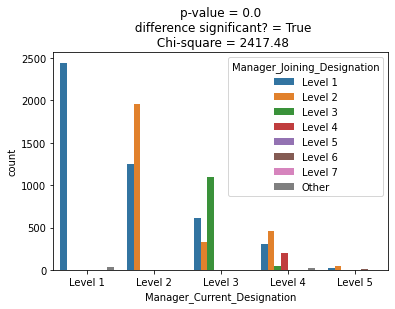

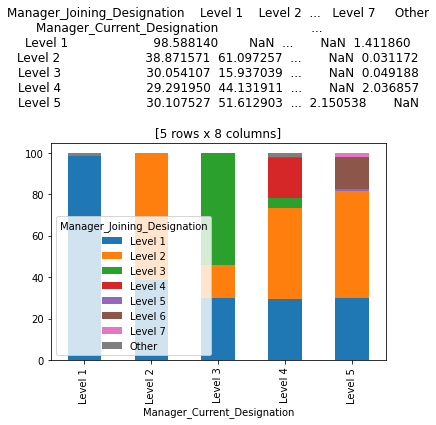

In [37]:
BVA_categorical_plot(df, 'Manager_Joining_Designation', 'Manager_Current_Designation')

As p=0 we can say that these two features have significant impact on each other.

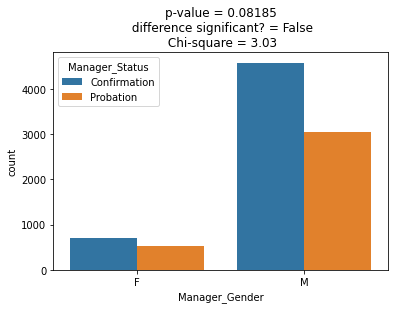

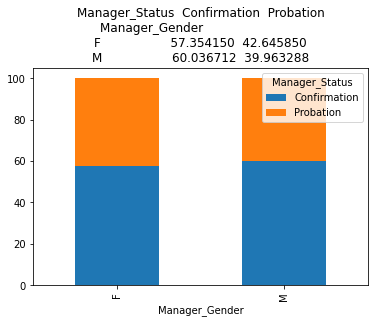

In [38]:
BVA_categorical_plot(df, 'Manager_Status', 'Manager_Gender')

In this case the P value is much greater(P=0.8) which means they dont have any significant impact on each other

In [1]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

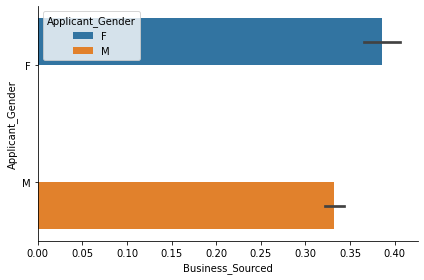

In [19]:

sns.barplot(x='Business_Sourced', y='Applicant_Gender',hue='Applicant_Gender', data=df)
sns.despine()
plt.tight_layout()

Business_Sourced 0 means not sucessful and sucessful should show 1. In the above graph it shows the rate of Female is more in Getting the sucess.

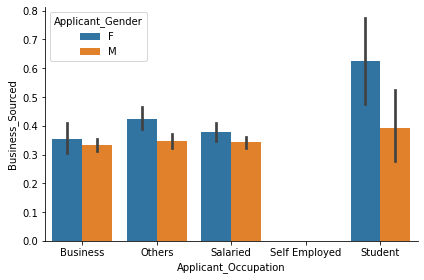

In [22]:
sns.barplot(x='Applicant_Occupation', y='Business_Sourced',hue='Applicant_Gender', data=df)
sns.despine()
plt.tight_layout()

In all the occupation Females are Sourceing more business than Males.

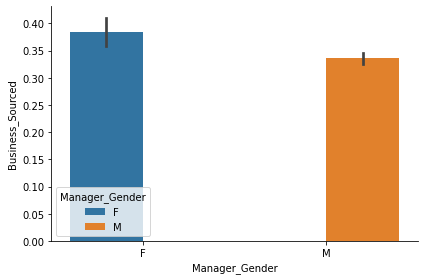

In [23]:
sns.barplot(x='Manager_Gender', y='Business_Sourced',hue='Manager_Gender', data=df)
sns.despine()
plt.tight_layout()

We can see that Female Manager have given more business than Male managers.

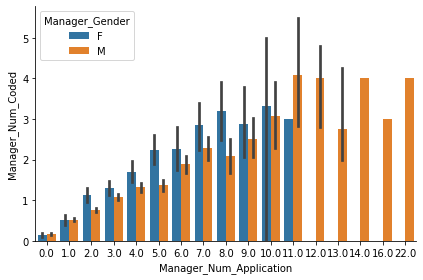

In [24]:
sns.barplot(x='Manager_Num_Application', y='Manager_Num_Coded',hue='Manager_Gender', data=df)
sns.despine()
plt.tight_layout()

# Conclusion:

*   Widow,Divorced and Female applicants have contributed the most to the     business
*  Widow Male Applicants who are business man have contributed the most to the company.
 

*   Confirmed managers withe level 4&7 joining Designation have contributed the most to the company
*   Probated Managers with Level 4 as there current designation have contributed more to the company.

*   Probated Female Managers with Grade-6 have contributed the most.
*   Confirmed Male Managers with Grade7 have contributed the most to the company





